In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats

In [2]:
# Files to Load 
chicago_marathon_winners = "Chicago_Marathon_Winners.csv"
london_marathon_winners = "London_Marathon_Winners.csv"
ny_marathon_winners = "NY_Marathon_Winners.csv"
winners = 'Marathon_Winners.csv'
# Read School and Student Data File and store into Pandas Data Frames
df = pd.read_csv(winners, encoding = 'latin-1')
chi_mar_data = pd.read_csv(chicago_marathon_winners, encoding="latin-1")
#chi_mar_data
lon_mar_data = pd.read_csv(london_marathon_winners, encoding="latin-1")
ny_mar_data = pd.read_csv(ny_marathon_winners, encoding="latin-1")
marathon_data_complete = pd.merge(chi_mar_data, lon_mar_data, left_on=['YEAR','Gender'], right_on = ['Year','Gender'])
del marathon_data_complete['Year']
marathon_data_complete.rename(columns = {'Winner Name_x':'Winner Name_Chicago','Winner Country_x':'Winner Country_Chicago','Time_x':'Time_Chicago','Marathon City_x':'City_Name_Chicago','Winner Name_y':'Winner Name_London','Winner Country_y':'Winner Country_London','Time_y':'Time_London','Marathon City_y':'City_Name_London'}, inplace = True)
#marathon_data_complete
marathon_data_complete_new = pd.merge(marathon_data_complete, ny_mar_data, left_on=['YEAR','Gender'], right_on = ['YEAR','Gender'])
marathon_data_complete_new
marathon_data_complete_new.rename(columns = {'Winner Name':'Winner Name_NY','Winner Country':'Winner Country_NY','Time':'Time_NY','Marathon City':'City_Name_NY'}, inplace = True)
marathon_data_complete_new
df.head()


,YEAR,Winner Name,Winner Country,Time,Gender,Marathon City
0,1977,Dan Cloeter,USA,2:17:52,M,Chicago
1,1978,Mark Stanforth,USA,2:19:20,M,Chicago
2,1979,Dan Cloeter,USA,2:23:20,M,Chicago
3,1980,Frank Richardson,USA,2:14:04,M,Chicago
4,1981,Phil Coppess,USA,2:16:13,M,Chicago


In [3]:
marathon_winners = 'Marathon_Winners.csv'
mar_data = pd.read_csv(marathon_winners, encoding="latin-1")
mar_data[['h','m','s']] = mar_data['Time'].astype(str).str.split(':', expand=True).astype(int)
mar_data['hours'] = mar_data['h'] + mar_data['m']/60 + mar_data['s']/3600
mar_data_male = mar_data[mar_data["Gender"]=='M']
mar_data_female = mar_data[mar_data["Gender"]=='F']
mar_data_male_chicago = mar_data_male[mar_data_male["Marathon City"]=='Chicago']
mar_data_male_ny = mar_data_male[mar_data_male["Marathon City"]=='NY']
mar_data_male_london = mar_data_male[mar_data_male["Marathon City"]=='London']
mar_data_female_chicago = mar_data_female[mar_data_female["Marathon City"]=='Chicago']
mar_data_female_ny = mar_data_female[mar_data_female["Marathon City"]=='NY']
mar_data_female_london = mar_data_female[mar_data_female["Marathon City"]=='London']
#Chicago Male data processing

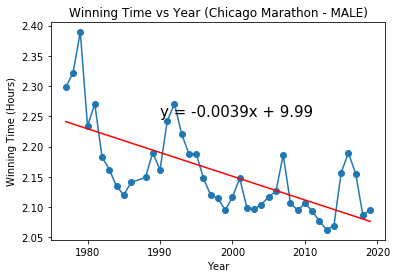

In [4]:
xdata=mar_data_male_chicago["YEAR"]
ydata=mar_data_male_chicago["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker='o')
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1990,2.25),fontsize=15,color="black")
plt.title("Winning Time vs Year (Chicago Marathon - MALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("Chicago_Male_WinningTime_Year.png")
#--------------------------------------------------------------------------------------

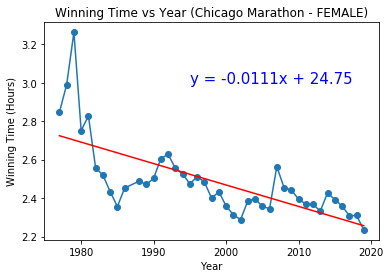

In [5]:
#Chicago Female data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_female_chicago["YEAR"]
ydata=mar_data_female_chicago["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1995,3),fontsize=15,color="blue")
plt.title("Winning Time vs Year (Chicago Marathon - FEMALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("Chicago_Female_WinningTime_Year.png")
#--------------------------------------------------------------------------------------

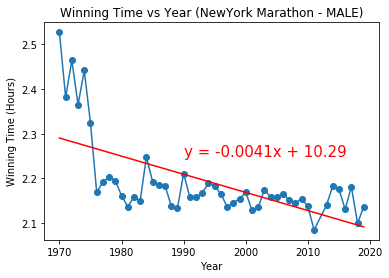

In [6]:
#NY male data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_male_ny["YEAR"]
ydata=mar_data_male_ny["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1990,2.25),fontsize=15,color="red")
plt.title("Winning Time vs Year (NewYork Marathon - MALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("NY_Male_WinningTime_Year.png")

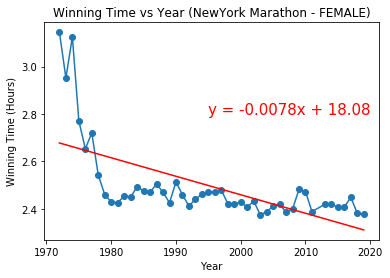

In [7]:
#NY Female data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_female_ny["YEAR"]
ydata=mar_data_female_ny["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1995,2.8),fontsize=15,color="red")
plt.title("Winning Time vs Year (NewYork Marathon - FEMALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("NY_Female_WinningTime_Year.png")
#--------------------------------------------------------------------------------------

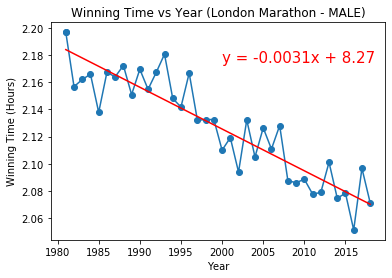

In [8]:
#London Male data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_male_london["YEAR"]
ydata=mar_data_male_london["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(2000,2.175),fontsize=15,color="red")
plt.title("Winning Time vs Year (London Marathon - MALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("London_Male_WinningTime_Year.png")

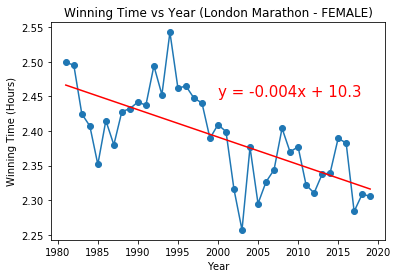

In [9]:
#London Female data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_female_london["YEAR"]
ydata=mar_data_female_london["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(2000,2.45),fontsize=15,color="red")
plt.title("Winning Time vs Year (London Marathon - FEMALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("London_Female_WinningTime_Year.png")
#--------------------------------------------------------------------------------------

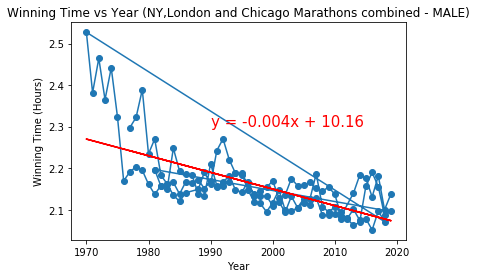

In [10]:
#All Male data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_male["YEAR"]
ydata=mar_data_male["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1990,2.30),fontsize=15,color="red")
plt.title("Winning Time vs Year (NY,London and Chicago Marathons combined - MALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("All_Male_WinningTime_Year.png")
#--------------------------------------------------------------------------------------

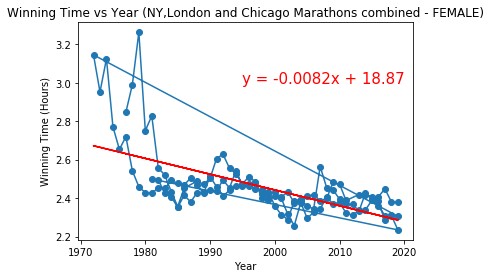

In [11]:
#All Female data processing
#--------------------------------------------------------------------------------------
xdata=mar_data_female["YEAR"]
ydata=mar_data_female["hours"]
#Create a Scatter Plot for Lattitude vs Temperature of City
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(xdata,ydata,marker="o")
plt.plot(xdata,regress_values,"r-")
plt.annotate(line_eq,(1995,3),fontsize=15,color="red")
plt.title("Winning Time vs Year (NY,London and Chicago Marathons combined - FEMALE)")
plt.ylabel("Winning Time (Hours)")
plt.xlabel("Year")
plt.savefig("All_Female_WinningTime_Year.png")

In [12]:
# Sonal's code starts here

In [13]:
# Sonal's code ends here

In [14]:
# Brian's code starts here


In [15]:
gdp = 'gdp_data.csv'
gdp_data = pd.read_csv(gdp, encoding = 'latin-1')
gdp_data['Winner Country'] = gdp_data['Country']
gdp = gdp_data['2017']
gdp2 = pd.DataFrame(gdp)
gdp2['Winner Country'] = gdp_data['Country']
gdp2 = gdp2.rename(columns={"2017" : "GDP/CAP"})

In [16]:
df_gdp = pd.merge(df, gdp2, how = 'left', on = 'Winner Country')

In [17]:

x_data_gdp = df_gdp['YEAR']
y_data_gdp= df_gdp['GDP/CAP']
mask = ~np.isnan(x_data_gdp) & ~np.isnan(y_data_gdp)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data_gdp[mask], y_data_gdp[mask])
regress_values_gdp = x_data_gdp * slope + intercept
line_eq_gdp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(pvalue)

4.6165677252211675e-27


Text(1985, 65000, 'y = -1404.15x + 2830927.88')

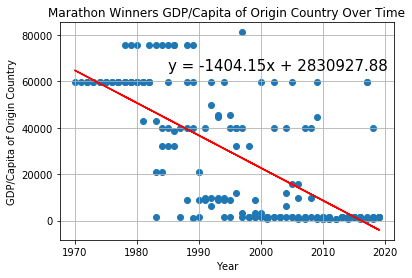

In [18]:
plt.scatter(x_data_gdp,y_data_gdp )
plt.title('Marathon Winners GDP/Capita of Origin Country Over Time')
plt.xlabel('Year')
plt.ylabel('GDP/Capita of Origin Country')
plt.grid()
plt.plot(x_data_gdp,regress_values_gdp,"r-")
plt.annotate(line_eq_gdp,(1985,65000),fontsize=15,color="black")



In [19]:
gini = 'gini_data.csv'
gini_data = pd.read_csv(gini, encoding = 'latin-1')
gini_data['Winner Country'] = gini_data['Country']
gini = gini_data['GINI']
gini2 = pd.DataFrame(gini)
gini2['Winner Country'] = gdp_data['Country']

In [20]:
df_gini = pd.merge(df, gini2, how = 'left', on = 'Winner Country')

In [21]:
x_data_gini = df_gini['YEAR']
y_data_gini= df_gini['GINI']
mask = ~np.isnan(x_data_gini) & ~np.isnan(y_data_gini)
(slope_g, intercept_g, rvalue_g, pvalue_g, stderr_g) = stats.linregress(x_data_gini[mask], y_data_gini[mask])
regress_values_gini = x_data_gini * slope_g + intercept_g
line_eq_gini = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(pvalue_g)

0.5542831615073762


Text(1970, 55, 'y = -1404.15x + 2830927.88')

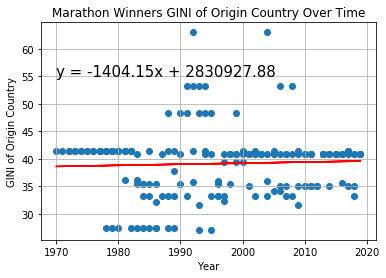

In [22]:
plt.scatter(x_data_gini,y_data_gini )
plt.title('Marathon Winners GINI of Origin Country Over Time')
plt.xlabel('Year')
plt.ylabel('GINI of Origin Country')
plt.grid()
plt.plot(x_data_gini,regress_values_gini,"r-")
plt.annotate(line_eq_gini,(1970,55),fontsize=15,color="black")

In [23]:
# Brian's code ends here

In [24]:
# Olga's code starts here

In [25]:
#marathon_data_complete_new
obesity = "Obesity Rates.csv"
obesity_data1 = pd.read_csv(obesity)
marathon = "Marathon_Winners.csv"
marathon_data = pd.read_csv (marathon, encoding="latin-1")
obesity_data = obesity_data1.drop(columns=['Unnamed: 0'])
marathon_and_obesity_data = pd.merge(marathon_data, obesity_data, left_on=['Winner Country'], right_on = ['Country'])
marathon_df = pd.DataFrame(marathon_and_obesity_data)

In [26]:
od = marathon_and_obesity_data.groupby('Winner Country' ,as_index=False )['Obesity'].mean()
od2 =marathon_and_obesity_data.groupby('Winner Country' ,as_index=False )['Country'].count().rename(columns={'Country': 'Number of wins'})
group= pd.merge(od, od2, left_on=['Winner Country'], right_on = ['Winner Country'])
group.head()

,Winner Country,Obesity,Number of wins
0,Australia,29,1
1,Brazil,22,6
2,Eritrea,5,1
3,Ethiopia,5,13
4,Finland,22,2


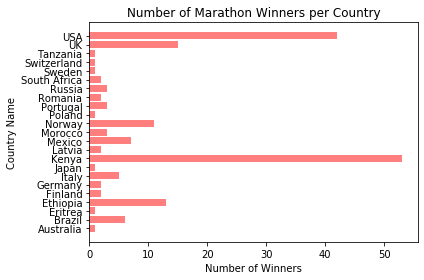

In [27]:
country = group['Winner Country'].values.tolist()
wins =group['Number of wins'].values.tolist()
obesity= group['Obesity'].values.tolist()
plt.barh(country,wins, color='r', alpha=0.5, align="center")
plt.ylabel('Country Name')
plt.xlabel('Number of Winners')
plt.title('Number of Marathon Winners per Country')
plt.tight_layout()

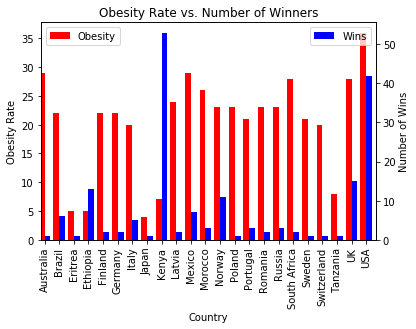

In [28]:
newdf=group.rename(columns ={'Winner Country': 'Country', 'Number of wins': 'Wins'})
newdf.set_index('Country',inplace=True)
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
newdf.Obesity.plot(kind='bar', color='red', ax=ax, width=width, position=1)
newdf.Wins.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Obesity Rate')
ax2.set_ylabel('Number of Wins')
ax.set_title('Obesity Rate vs. Number of Winners')
ax.legend()
ax2.legend()
plt.show()

In [ ]:
# Olga's code ends here